# Opdracht 13

Do a bivariate analysis on the penguins dataset for the following combinations of columns

- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:

- Do you expect there to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the change of there being a correlation between the two columns?

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt

In [2]:
pg = sns.load_dataset("penguins")
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Species VS sex

Ik verwacht dat er een correlatie tussen de columns zullen zijn. Ik denk dat over het algemeen mannetjes penguins groter zullen zijn dan vrouwtjes

In [3]:
grouped = pg.groupby(["sex", "species"]).mean().unstack("sex")
grouped

bill_length_mm            bill_depth_mm             \
sex               Female       Male        Female       Male   
species                                                        
Adelie         37.257534  40.390411     17.621918  19.072603   
Chinstrap      46.573529  51.094118     17.588235  19.252941   
Gentoo         45.563793  49.473770     14.237931  15.718033   

          flipper_length_mm              body_mass_g               
sex                  Female        Male       Female         Male  
species                                                            
Adelie           187.794521  192.410959  3368.835616  4043.493151  
Chinstrap        191.735294  199.911765  3527.205882  3938.970588  
Gentoo           212.706897  221.540984  4679.741379  5484.836066

<AxesSubplot:xlabel='species'>

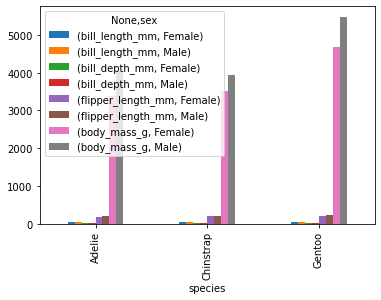

In [4]:
grouped.plot(kind="bar")

Er is een verschil te zien tussen de categorieen, vooral de body mass. De twee andere attributes zien we niet een sterk verschil tussen, omdat de waarden van 0 tot 5000 gaan, en die waarden waarschijnlijk tussen 0 en max 200 lopen.

In [5]:
chi2_contingency(grouped)

(26.05405185445604,
 0.02548035798187525,
 14,
 array([[  38.42948228,   41.86375404,   14.68577902,   16.05061225,
          175.89068661,  182.31377235, 3437.93682479, 3999.70580098],
        [  38.84481897,   42.31620752,   14.84449943,   16.22408345,
          177.79167127,  184.28417619, 3475.09322731, 4042.93366881],
        [  52.12055551,   56.77833753,   19.91780569,   21.768881  ,
          238.55435334,  247.26575867, 4662.752826  , 5424.66033471]]))

Er is hier te zien de P waarde van deze test < 0.05 is, en daarom een prima verband is.

## Island VS Sex

Ik verwacht dat er enige correlatie tussen deze columns kan zijn, omdat sommige penguins minder zwemmen dan anderen, denk aan de penguins die op de kust van Zuid-Afrika leven. Hierdoor hebben ze minder grote flippers nodig

In [6]:
grouped = pg.groupby(["island", "sex"]).mean().unstack("sex")
grouped

bill_length_mm            bill_depth_mm             \
sex               Female       Male        Female       Male   
island                                                         
Biscoe         43.307500  47.119277     15.191250  16.597590   
Dream          42.296721  46.116129     17.601639  19.066129   
Torgersen      37.554167  40.586957     17.550000  19.391304   

          flipper_length_mm              body_mass_g               
sex                  Female        Male       Female         Male  
island                                                             
Biscoe           205.687500  213.289157  4319.375000  5104.518072  
Dream            190.016393  196.306452  3446.311475  3987.096774  
Torgersen        188.291667  194.913043  3395.833333  4034.782609

<AxesSubplot:xlabel='island'>

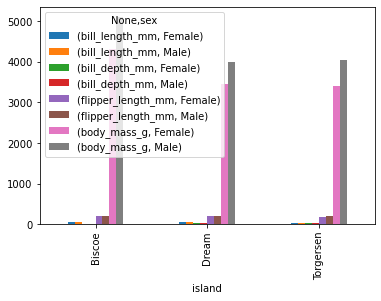

In [7]:
grouped.plot(kind="bar")

Er is te zien dat de penguins op het eiland Biscoe zwaarder zijn dan op de andere eilanden. We zien hier ook dat de bill length kleiner is op Torgersen dan op de andere eilanden.

In [8]:
chi2_contingency(grouped)

(11.866005868933847,
 0.617062712376073,
 14,
 array([[  47.49771045,   51.61041759,   19.41542123,   21.23272007,
          225.22584512,  233.13699841, 4304.59219813, 5062.37403538],
        [  37.86825232,   41.14716893,   15.47923181,   16.92810019,
          179.56463696,  185.87192095, 3431.89981102, 4036.0525912 ],
        [  37.79242521,   41.06477614,   15.4482363 ,   16.89420348,
          179.20507803,  185.49973236, 3425.02779959, 4027.9708286 ]]))

Als we hier kijken naar de uitkomst van de P value, is dit een percentage van 61,7%. Er is geen sprake van een verband.
Mijn verwachting is hierbij dus ontkracht.